In [1]:
# check if IS_MASTER exists, this variable will only exist if it's being called by MASTER notebook.
# if it does not exist, set it to False
try: use_MASTER
except: use_MASTER = False

if not use_MASTER:
    #%run imports.ipynb
    from pathlib import Path
    import pickle,sys
    home = str(Path.home())
    
    sys.path.append(f'{home}/Desktop/breast_cancer_PHD_research/functions/')
    
    
    with open(f'{home}/Dropbox/CyTOF_Breast/data_yishai/default_data.p', 'rb') as f:
      [df,config] = pickle.load(f)
    del f, home



# config['show'] = False





imprt needed pakcages

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1' 
# remove avx warning:
# I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
# To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.

from pandas import DataFrame,Series
# from typing import List
import numpy as np
from numpy import ndarray
from matplotlib.pyplot import figure

# from pandas import read_csv
# from umap import UMAP

# from sklearn.preprocessing import StandardScaler
# from sklearn.cluster import  DBSCAN


# from os.path import isfile

  
# from parent_class import * 




In [3]:
# import numpy as np 
# import pandas as pd 
# from seaborn import clustermap
# import matplotlib.pyplot as plt
# class Heatmaps(Parent):
    
#     def __init__(self, **kwargs):
#         self.__dict__.update(kwargs)#import keys and values from dictionary to class
#         # self.get_attribute()#print all attributes
#         # self.calc_db = False
#         self.folderExists(self.dir_plots)#verify that plots folder exists
        
#         # CellCycle feature is only in the '.2' data
#         self.features_groups = ['CellIden', 'EpiCols', 'CellIden+EpiCols'] if '.2' not in self.j else ['CellIden', 'EpiCols', 'CellIden+EpiCols'] + ['CellCycle']
        
#     def plot(self, df: DataFrame,labels:Series,features:list[str],ind:list[int] = [],title:str = '',figname:str = '' ,amin = None,amax = None,rot_tentogram = False) -> None:
#         '''
#         calculates the mean of the features for each label and saves it as a csv file
#         load the csv file and plot it as a heatmap
#         mat - the heatmap matrix
#         '''
#         self.to_csv( df,labels,features,ind,figname )
#         mat = pd.read_csv(self.dir_plots+figname+'.csv',index_col=0)
#         self.to_heatmap(mat,title,figname,amin,amax,rot_tentogram)
         
#     def to_heatmap(self,mat:DataFrame,title:str = '',figname:str = '' ,amin = None,amax = None,rot_tentogram = False) -> None:
        
        
        
#         figsize = (max(10, int(np.ceil(len(mat.index)*0.7))), max(10, int(np.ceil(len(mat.columns)*0.7))))
#         # amin,amax - defines the  colormap dynamic range
#         amin=mat.min().min() if amin is None else amin
#         amax=mat.max().max() if amax is None else amax
        

#         if rot_tentogram:
#             row_cluster,col_cluster=True,False,
#         else:    
#             row_cluster,col_cluster=False,True,

#         # fig,axs = plt.subplots(1,figsize=(10, 10))
#         # g is a seaborn clustermap (not a figure)
#         g = clustermap(mat,cmap=plt.cm.seismic,vmin=amin,vmax=amax,
#                         row_cluster=row_cluster,col_cluster=col_cluster,
#                         figsize=figsize, annot_kws={"size":8}, center=0,
#                         annot=True, linewidths=1,linecolor='k')
#         g.ax_col_dendrogram.set_title(title) 
#         # plt.show()
#         self.figSettings(g.fig,figname,)
        
        
        
#     def to_csv(self, df: DataFrame,labels:Series,features:list[str],ind:list[int] = [],figname:str = '' ) -> None:
#         '''
#         calculates the mean of the features for each label and saves it as a csv file
#         used for plotting heatmaps of the data
        
#         drop anchor data columns (with '.1' in the name) if they exist and are not all the columns of the dataframe
#         '''
        
#         ind = list(df.index) if not ind else ind# if ind is empty take all indexes
#         mat = df.loc[ind].groupby(by=labels.loc[ind]).mean(numeric_only=True)[features].T
        
#         drop_cols = [i for i in mat.columns if '.1'  in str(i)]
#         drop_cols = drop_cols if len(drop_cols) < len(mat.columns) else []
        
#         mat.drop(drop_cols,axis = 1,inplace=True)
#         mat = mat.loc[sorted(mat.index)]
#         mat = mat[sorted(mat.columns)]
#         mat.to_csv(self.dir_plots+figname+'.csv')
        
#         # plotHeatMap(Mat,title,settings,figname,amin = amin,amax = amax,rot_tentogram = rot_tentogram)
    
from heatmap import Heatmap
heatmaps = Heatmap(**config)



The directory already exists!


compare sample 11,stroma and rest of the cells


In [4]:
# config['compare'] =True
# if config['visualize'] and 'b2345' in config['j'] and config['compare']:# compare sample 11,stroma and rest of the cells
#     # load from file
#     stroma = heatmaps.pickle_load('k'+'b2345s'+'_dict', dir_data)['k'].reset_index(drop=True);stroma['samp'] = 'stroma'

#     df = heatmaps.pickle_load('k'+'b2345a'+'_dict', dir_data)['k'].copy().reset_index(drop=True)
#     types = {4:'LUM-A',5:'LUM-A',7:'LUM-B',8:'LUM-A',13:'LUM-B',14:'LUM-B',15:'LUM-A',
#              17:'LUM-B',18:'LUM-A',19:'LUM-A',20:'LUM-A',11:'TN',}

#     # drop .1 samples
#     for samp in df['samp'].unique():
#         if '.1' in str(samp):
#             ind = df['samp']==samp
#             df.drop(df[ind].index,inplace=True)
#     IND = ~np.zeros(len(df)).astype(bool) #index of all the cells - initiated all true

#     for samp,type_ in types.items():
#         ind = df['samp']==samp
#         df['samp'][ind] = type_

#         IND*=~ind# remove the sample cells from the rest of the cells

    
#     df['samp'][IND] = 'rest'
#     df = pd.concat([df.copy(),stroma], ignore_index=True,axis=0,).reset_index(drop=True)
#     print(df['samp'].unique())



#     from plot_functions import *
#     for features_name in [i for i in ['CellIden', 'EpiCols', 'CellIden+EpiCols', 'CellCycle'] if i in groups.keys()]:
#         features = groups[features_name].copy() 
#     # for group_name, group in zip(groups[0], groups[1]):#df[labels != -1]
        
#     # group_name, group = groups[0][-1], groups[1][-1]
#         HeatMap(df,df['samp'] ,features, settings, labels_type='samp',
#                 title='HeatMap ' + title + ': ' + features_name+' stroma_luma_lumb_tn',
#                 figname='1_'+figname+'stroma_luma_lumb_tn_' + features_name)


In [5]:

if not use_MASTER:
    heatmaps.get_attribute()#print all attributes  
    labels = Series(np.random.randint(-1,5,df.shape[0]))#random labels for testing
    
    samples = Series(df['samp'])
    classes =  Series(np.random.randint(0,2,df.shape[0]))#random classes for testing

    



    

j         : b2345a_reduced
feautures_ind: 2
data_folder: Data_
visualize : True
plotUMAP  : True
show      : True
saveSVG   : False
recalculate_umap: True
recalculate_db: True
create_adjusted: False
compare   : False
isSingleSample: False
home      : /Users/yishai
dir_data  : /Users/yishai/Dropbox/CyTOF_Breast/data_yishai/Data_/
dir_index : /Users/yishai/Dropbox/CyTOF_Breast/data_yishai/indexes/
dir_plots : /Users/yishai/Dropbox/CyTOF_Breast/data_yishai//plots/_sample_b2345a_28022024_Data_/
dir_functions: /Users/yishai/Desktop/breast_cancer_PHD_research/functions/
save_add  : /Users/yishai/Dropbox/CyTOF_Breast/data_yishai/
name      : CellIden+EpiCols
title     : sampb2345a_reduced CellIden+EpiCols Based 
figname   : sampb2345a_reduced_CellIden+EpiCols_Based_
features  : ['K5', 'EpCam', 'aSMA', 'Vimentin', 'ER', 'CD49f', 'CD24', 'GATA3', 'CD44', 'K8-18', 'Ki67', 'ECad', 'panKeratin', 'H3K27me2', 'H3K36me2', 'H3K4me1', 'H3K9me2', 'H4K16ac', 'H2Aub', 'H3K64ac', 'H3K27ac', 'H4K20me3', 'BM

In [6]:
if not use_MASTER:
    home = str(Path.home())
    with open(f'{home}/Dropbox/CyTOF_Breast/data_yishai/default_data_umap.p', 'rb') as f:
      [umapData] = pickle.load(f)
    del f, home

In [7]:
# # if not use_MASTER:

# if config['visualize'] and not config['isSingleSample']:
#     # unique by_sample values
#     for sampNum in np.unique(samples):
#         ind_samp = [i for i, j in enumerate(samples == sampNum) if j]
#         labels_samp = np.ones(len(ind_samp))*sampNum
#         drawUMAPbySample(umapData, df, ind_samp, labels_samp, settings,
#                          title=title+f' UMAP - by_sample={sampNum}',
#                          Figname='4_'+figname+f'UMAP_sample{sampNum}_by_sample')
#     arr = []
#     clustNums = np.unique(k.Clust)
#     clustNums = clustNums[clustNums != -1]
#     for clustNum in clustNums:
#         ind = k.Clust == clustNum
#         PercentageBySample = ClustPercentageBySample(k[ind], 'samp')

#         arr.append([clustNum, PercentageBySample])
#     saveCsv(dir_plots, figname, arr)

heatmap by sample and and class

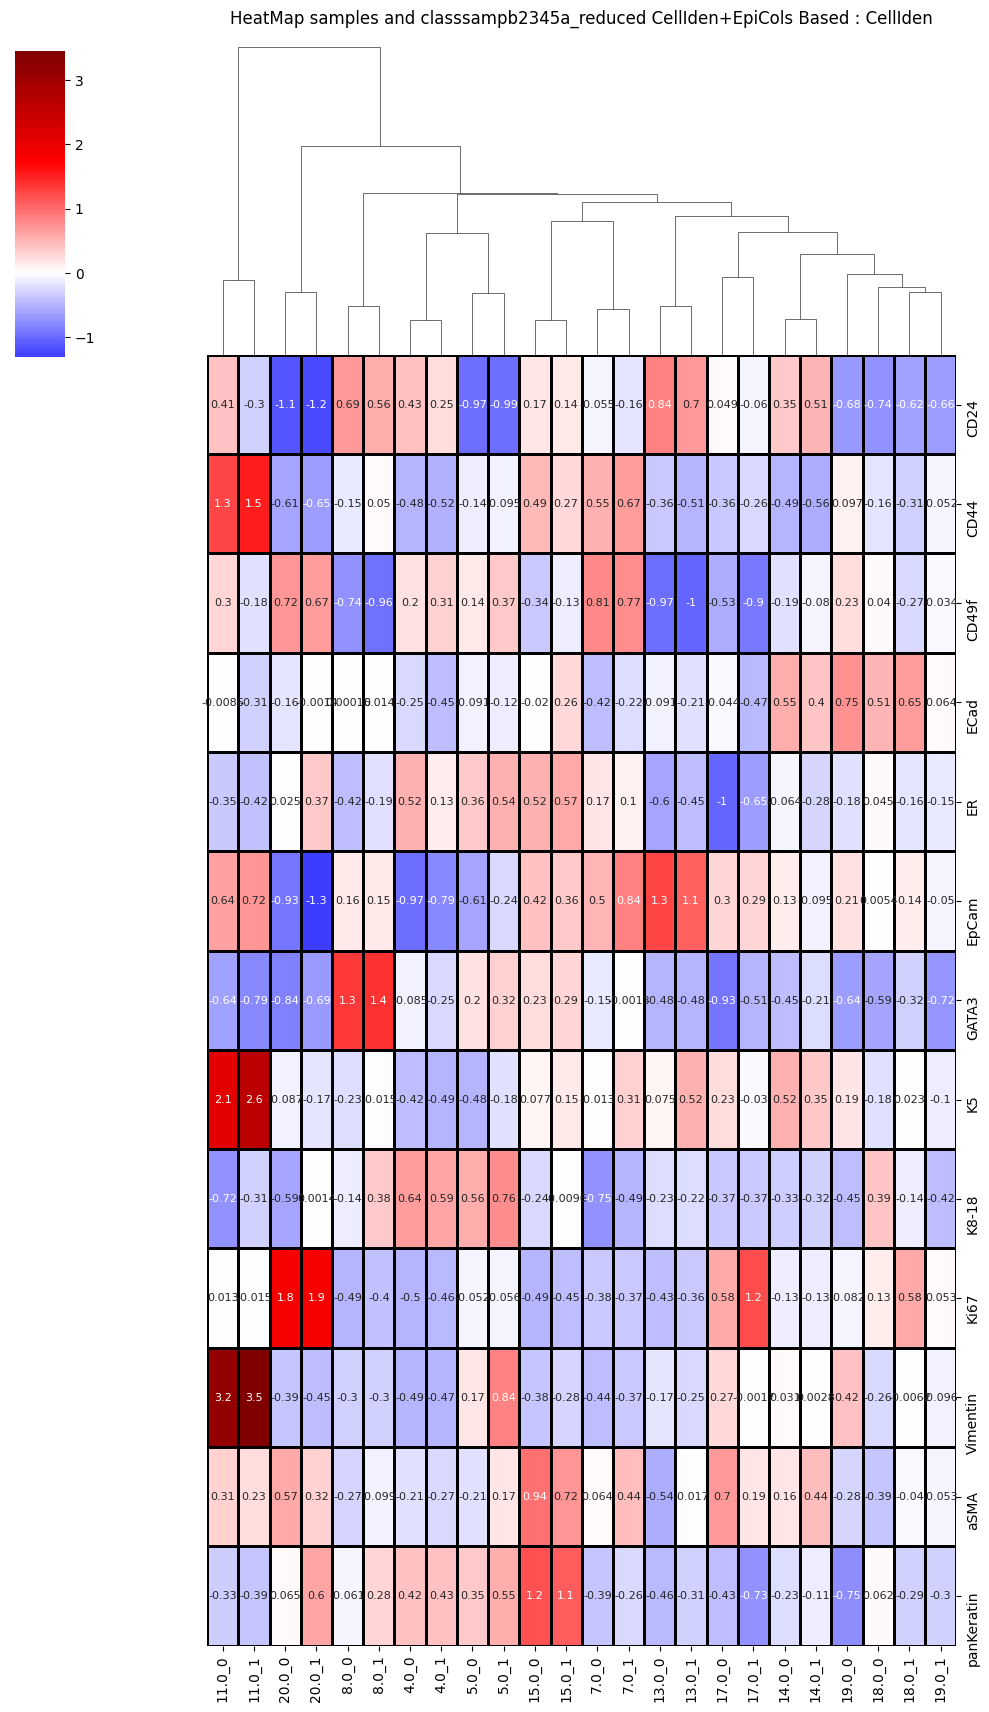

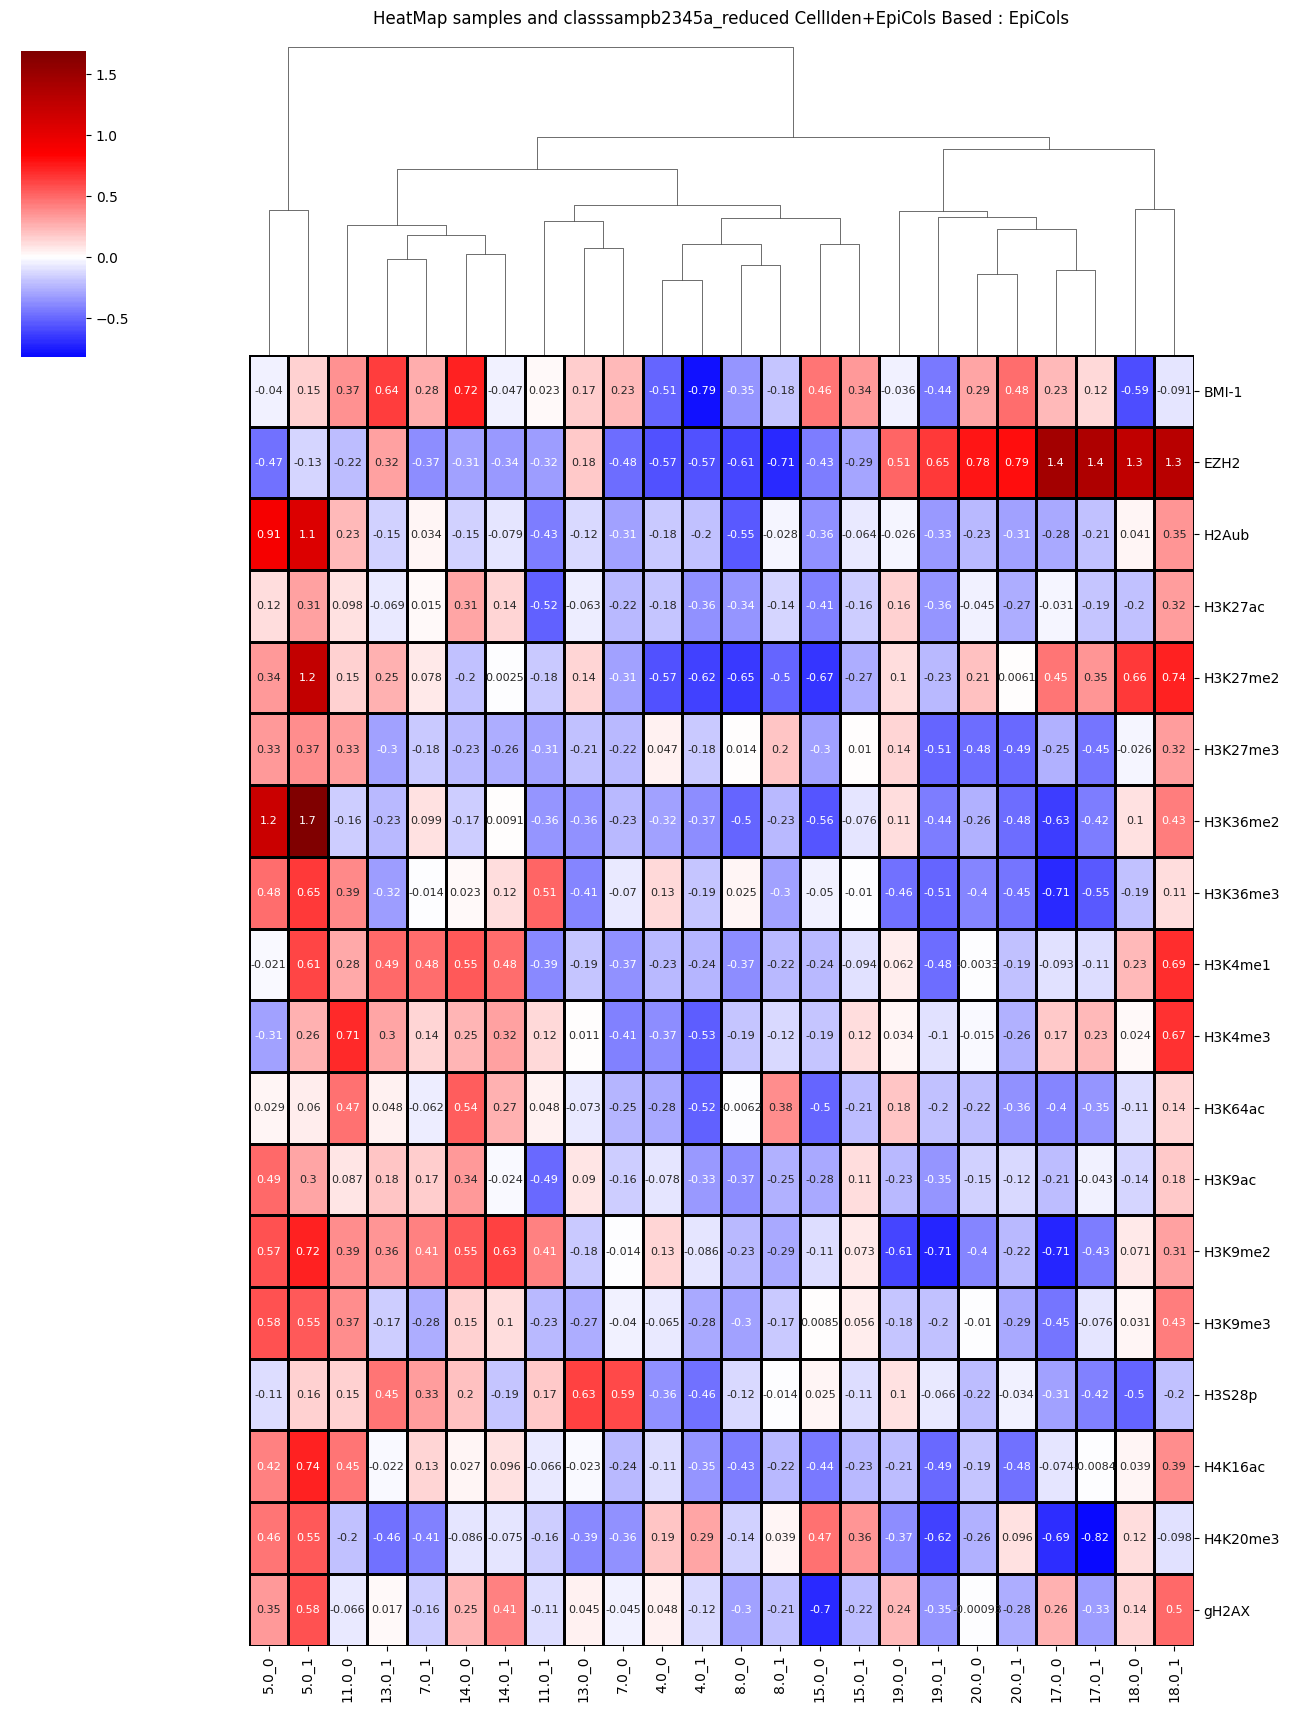

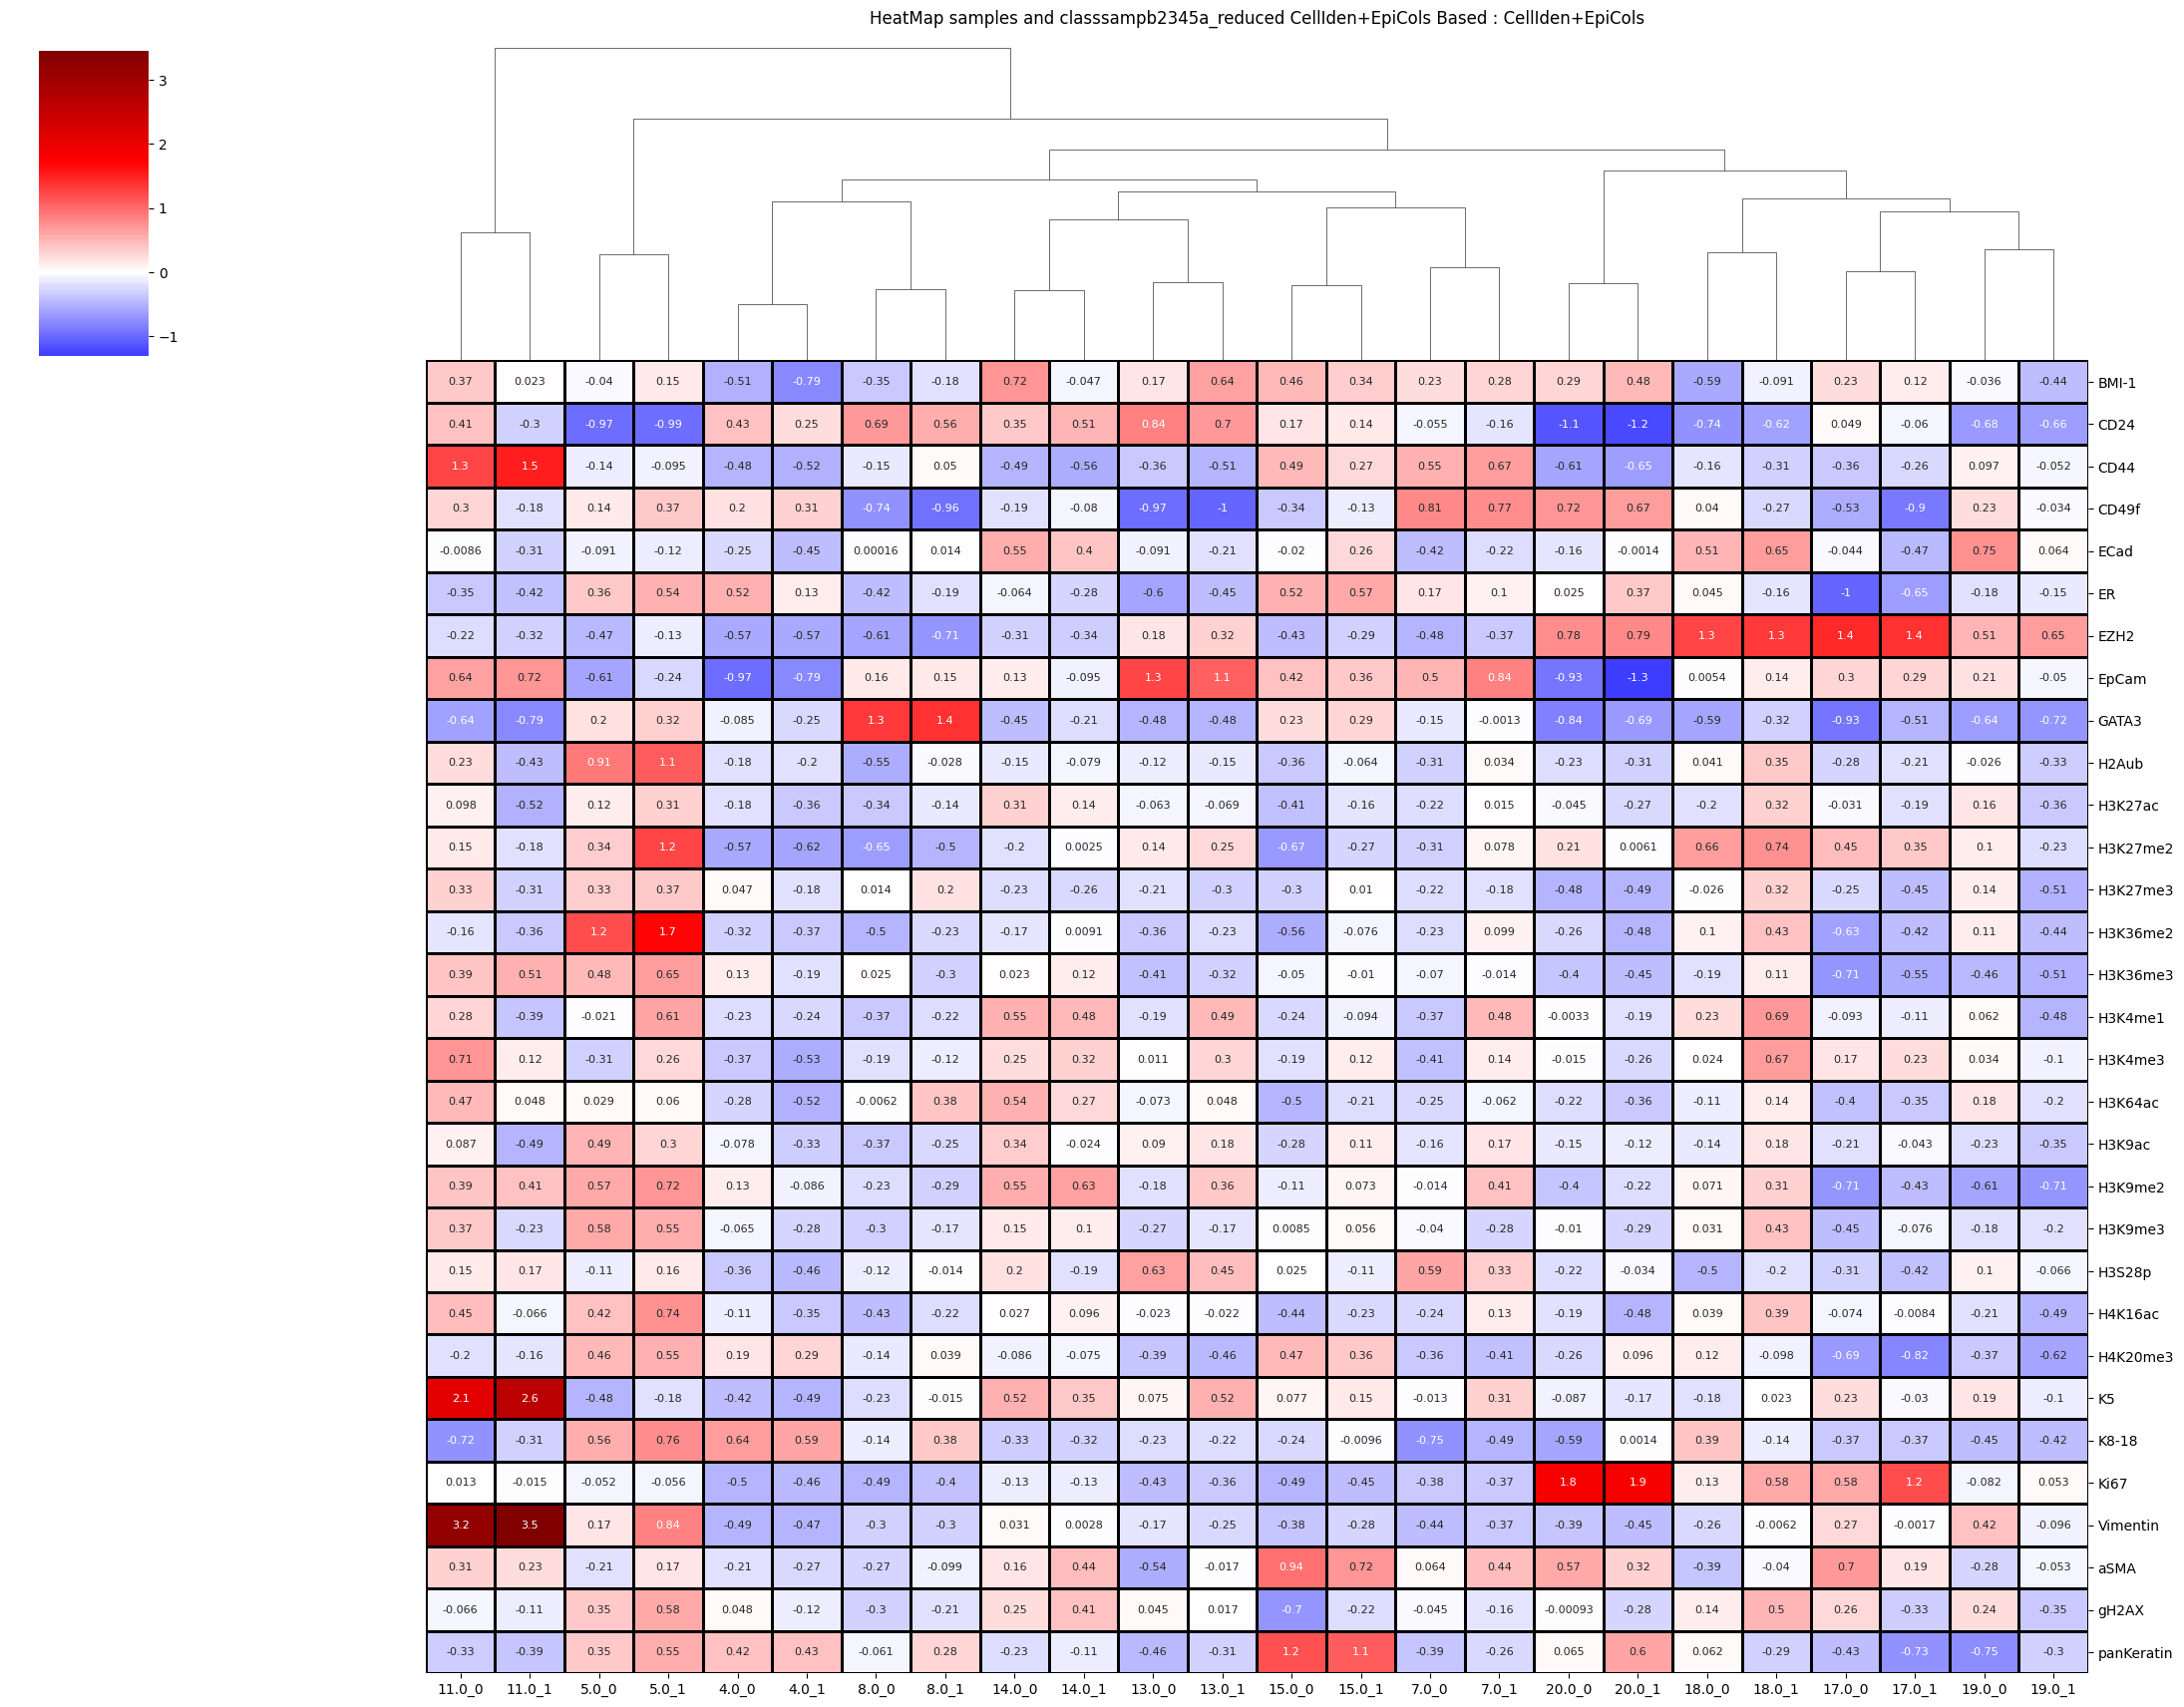

heatmap by sample and and class - done


In [8]:
if not use_MASTER:
    
    samp_class = Series(samples.astype(str)+'_'+classes.astype(str))

    for features_group in heatmaps.features_groups:# CellCycle features are present only in the '.2' data other wise only epigenetic and cellcycle features
        heatmaps.plot(  df.copy(), samp_class.copy(),features = config['groups'][features_group].copy(),
                        # ind = list(df.index[labels != -1]),#remove unclustered -1
                        title='HeatMap samples and class' + config['title'] + ': '+features_group,
                            figname='3_HeatMap_samples_and_classes'+config['figname']+'using_'+features_group,)
    del samp_class
    print('heatmap by sample and and class - done')
    

HeatMap by clusters


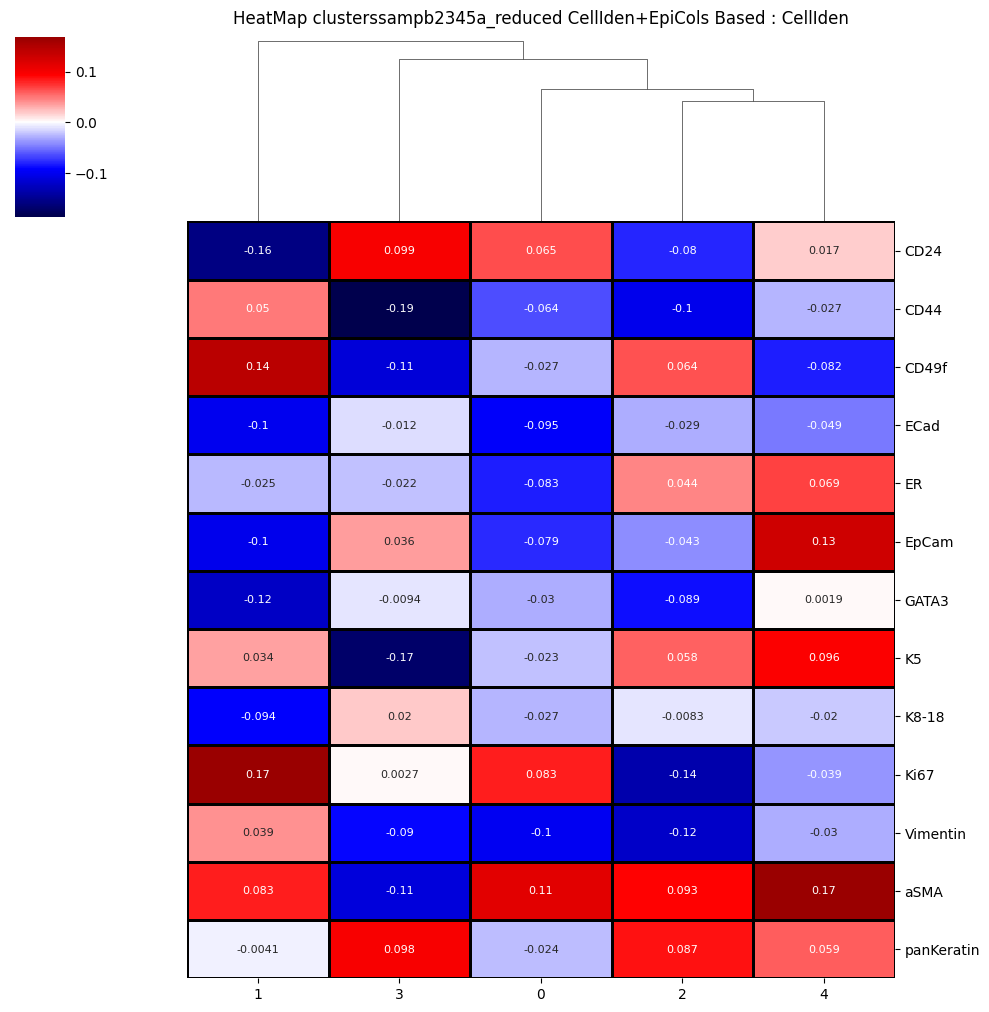

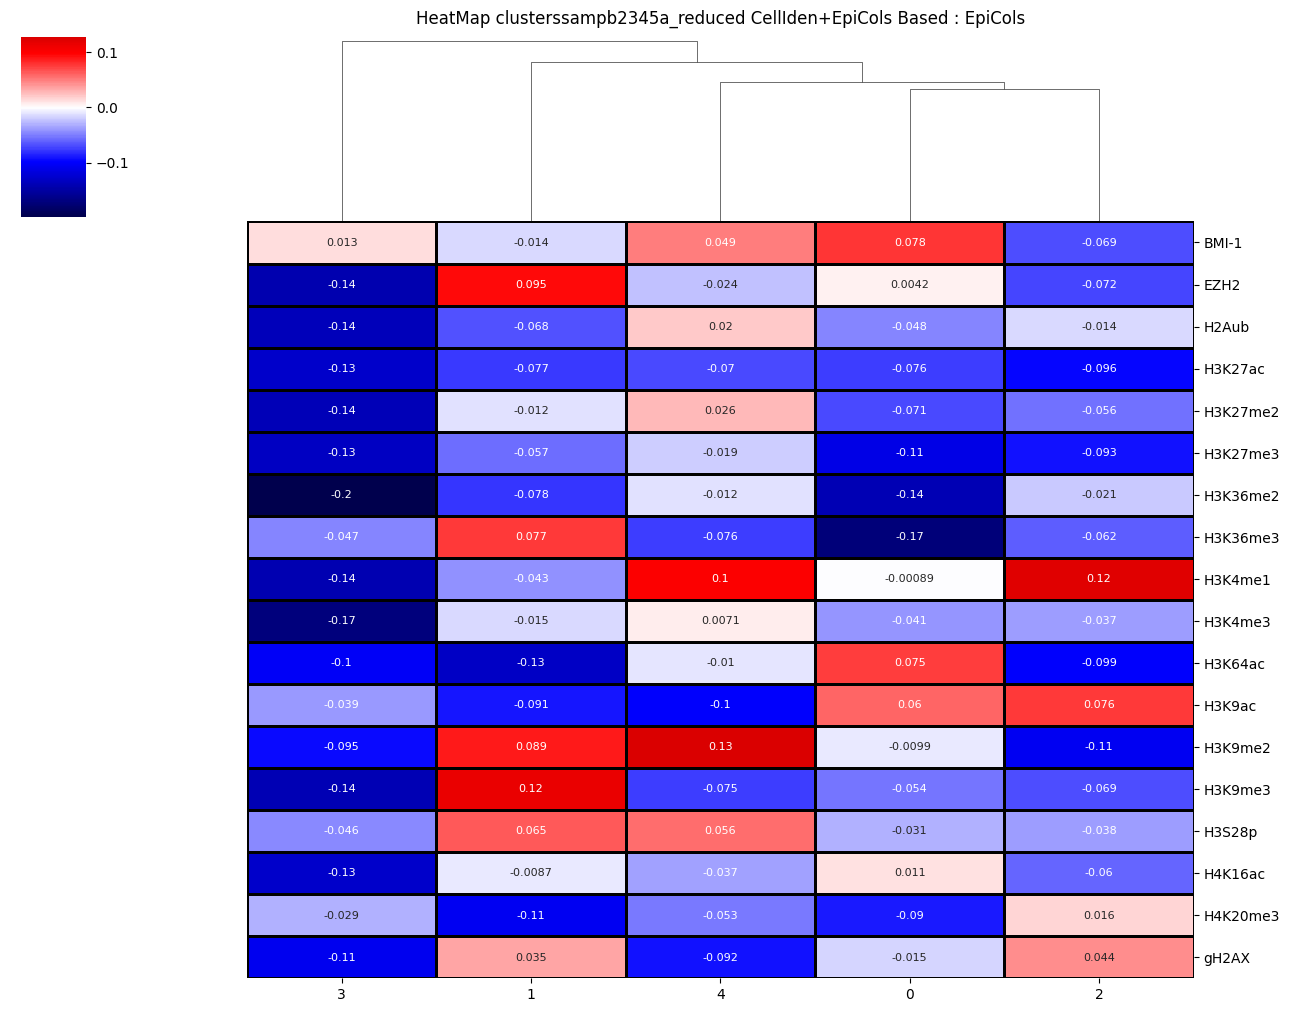

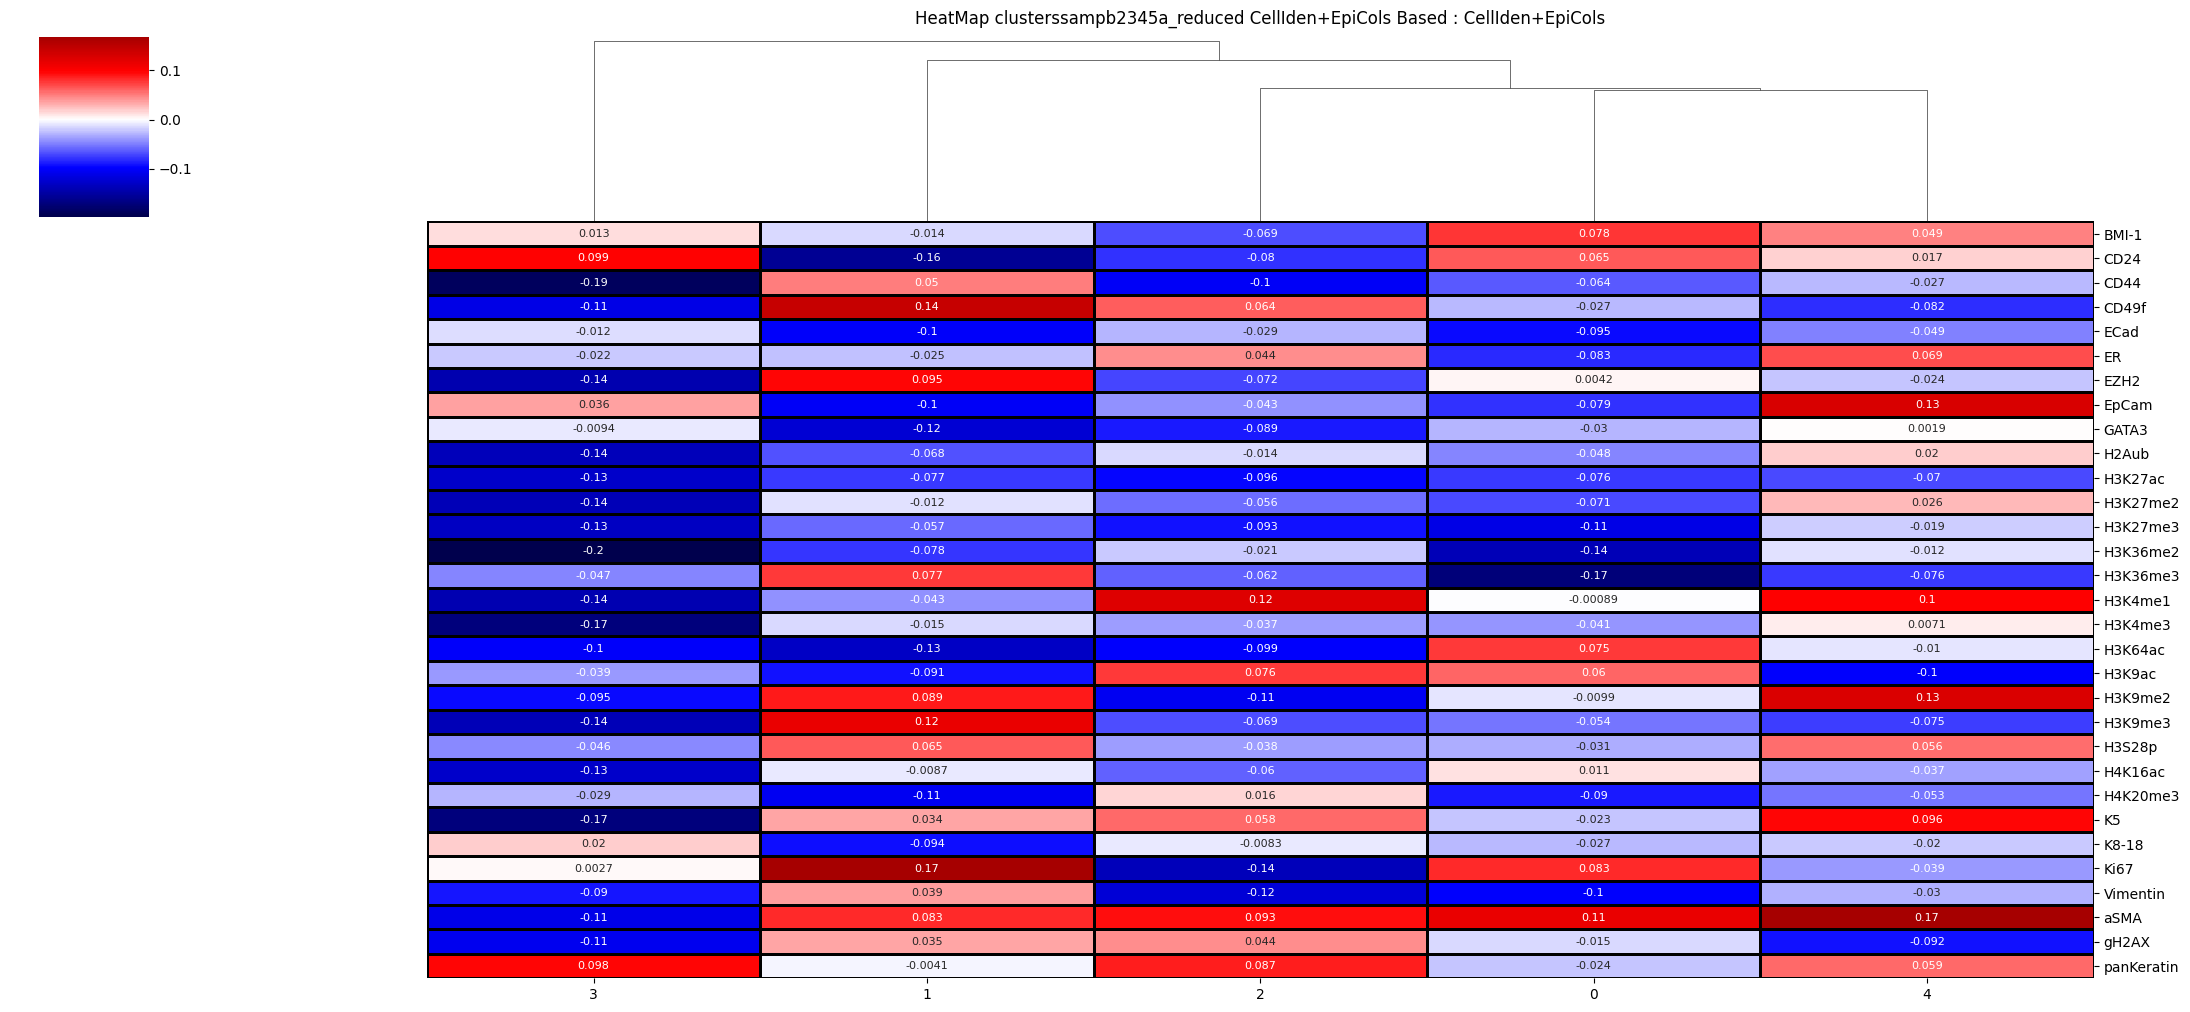

HeatMap by clusters - done


In [9]:
if not use_MASTER:

    
    for features_group in heatmaps.features_groups:# CellCycle features are present only in the '.2' data other wise only epigenetic and cellcycle features
        heatmaps.plot(  df.copy(), labels.copy(),
        
                        features = config['groups'][features_group].copy(),
                        ind = list(df.index[labels != -1]),#remove unclustered -1
                        title='HeatMap clusters' + config['title'] + ': '+features_group,
                        figname='3_HeatMap_clusters_'+config['figname']+'using_'+features_group,)
        
    print('HeatMap by clusters - done')   

                

HeatMap by sample - only for batch

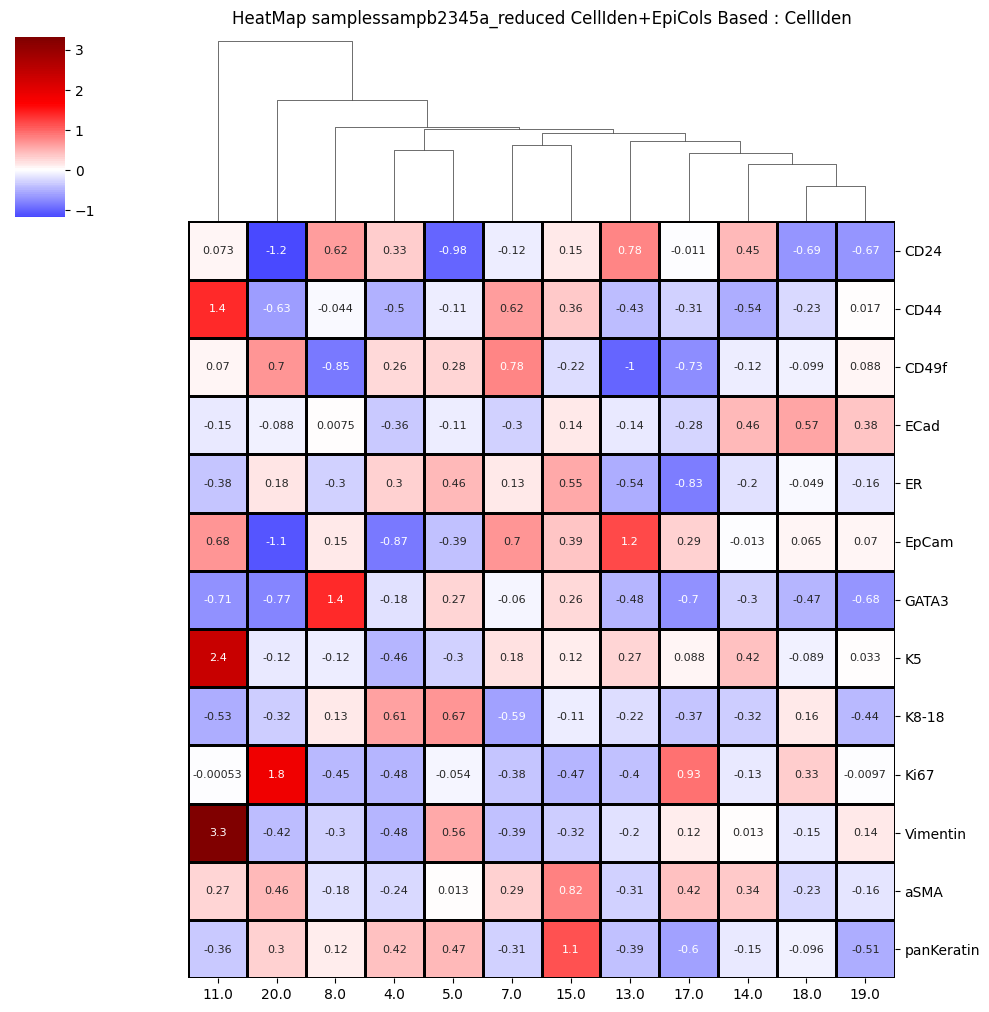

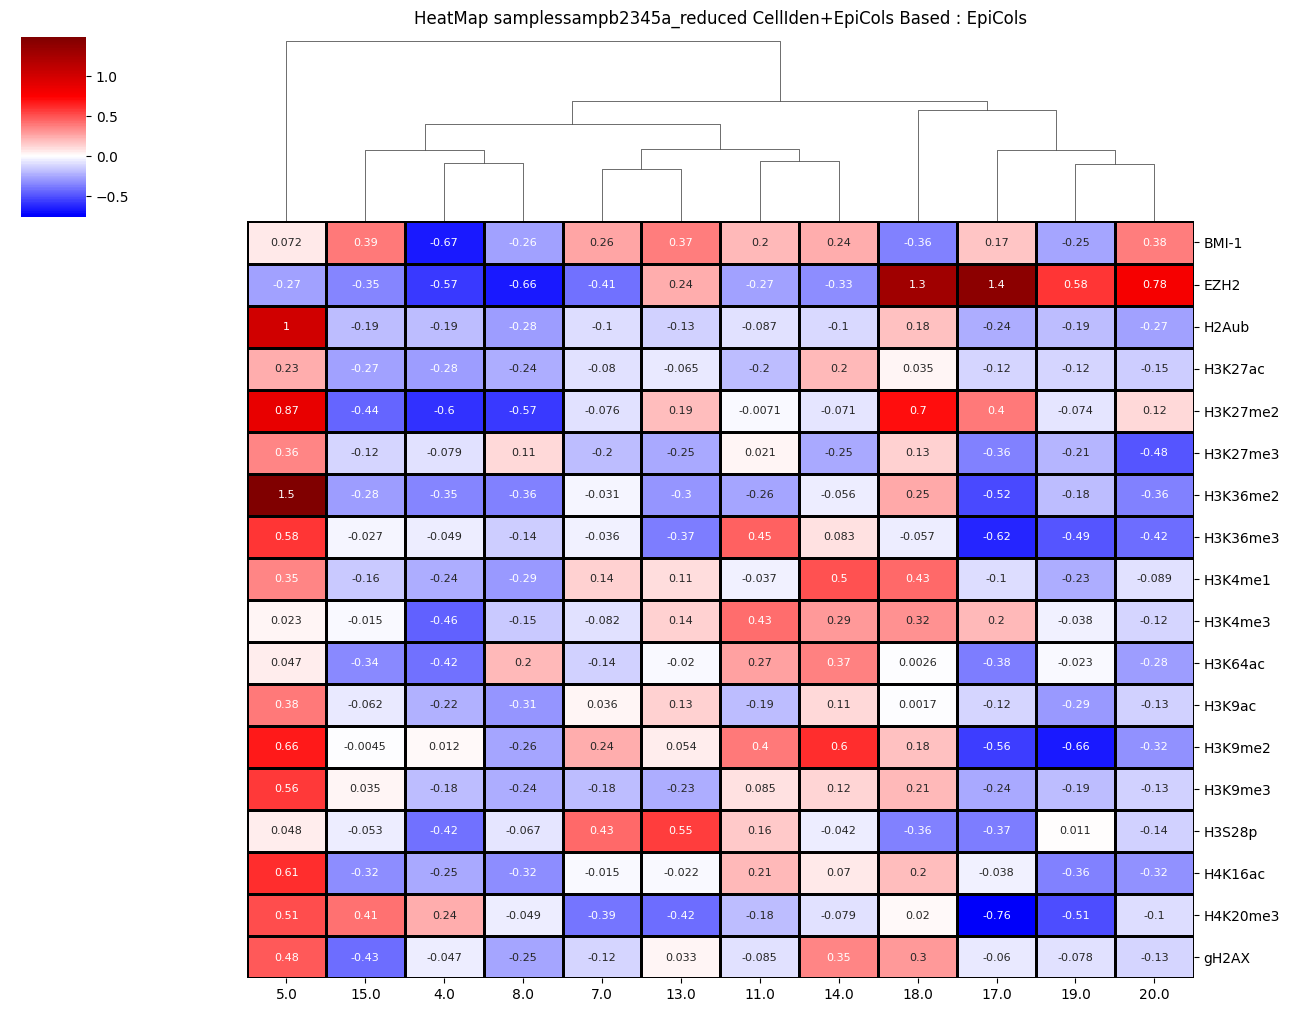

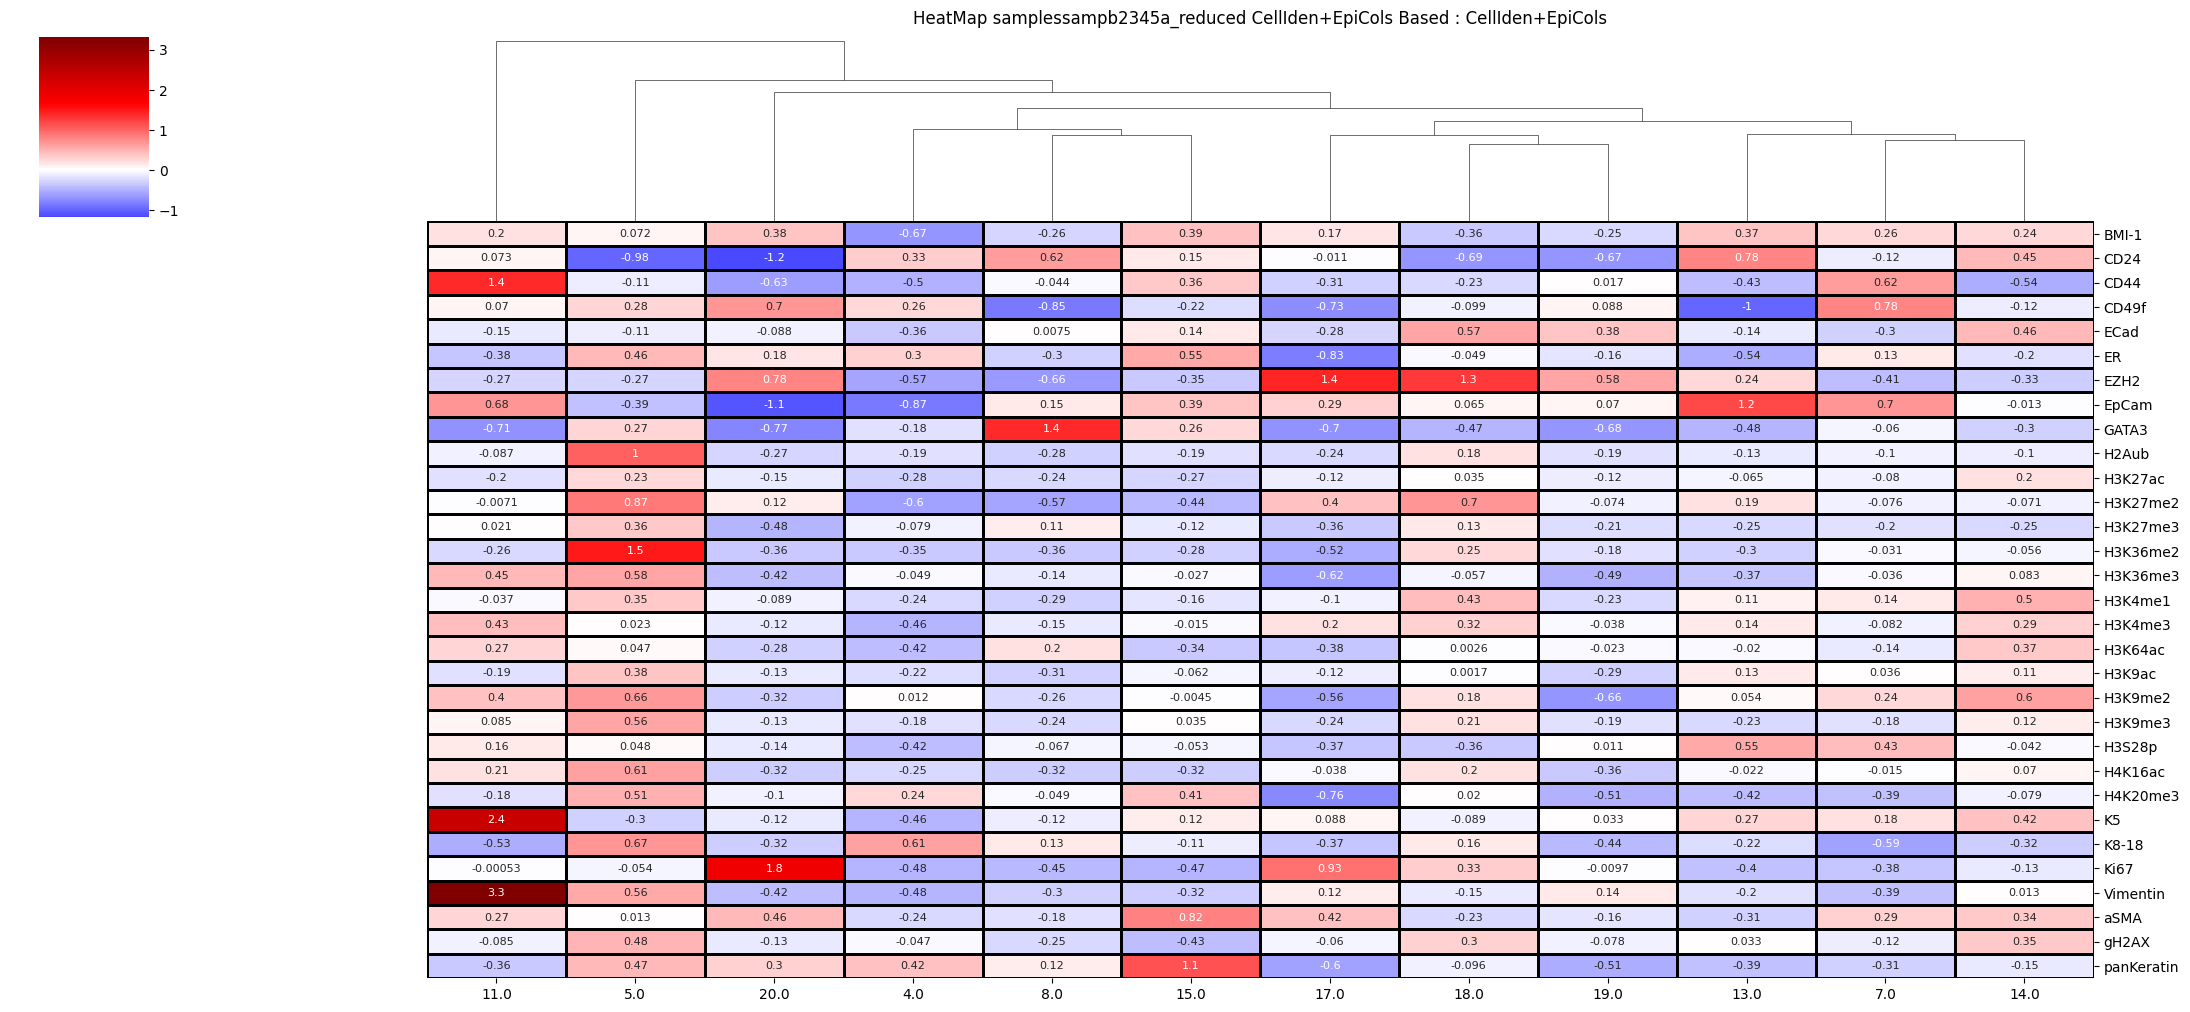

HeatMap by sample - done


In [10]:
if not use_MASTER:

    if config['visualize'] and not config['isSingleSample']:
        for features_group in heatmaps.features_groups:# CellCycle features are present only in the '.2' data other wise only epigenetic and cellcycle features  
                heatmaps.plot(  df.copy(), samples.copy(),
                                features = config['groups'][features_group].copy(),
                                # ind = list(df.index[labels != -1]),#remove unclustered -1
                                title='HeatMap samples' + config['title'] + ': '+features_group,
                                figname='3_HeatMap_samples_'+config['figname']+'using_'+features_group,)
        print('HeatMap by sample - done')

todo: heatmap by comparing 11,stroma and rest of the cells

In [11]:
# if config['visualize'] and'b2345' in j and compare:# compare sample 11,stroma and rest of the cells
#     # load from file
#     stroma = pickle_load('k'+'b2345s'+'_dict', dir_data)['k'].reset_index(drop=True);stroma['samp'] = 'stroma'

#     df = pickle_load('k'+'b2345a'+'_dict', dir_data)['k'].copy().reset_index(drop=True)
#     types = {4:'LUM-A',5:'LUM-A',7:'LUM-B',8:'LUM-A',13:'LUM-B',14:'LUM-B',15:'LUM-A',
#              17:'LUM-B',18:'LUM-A',19:'LUM-A',20:'LUM-A',11:'TN',}

#     # drop .1 samples

#     for samp in df['samp'].unique():
#         if '.1' in str(samp):
#             ind = df['samp']==samp
#             df.drop(df[ind].index,inplace=True)
#     IND = ~np.zeros(len(df)).astype(bool) #index of all the cells - initiated all true

#     for samp,type_ in types.items():
#         ind = df['samp']==samp
#         df['samp'][ind] = type_

#         IND*=~ind# remove the sample cells from the rest of the cells

    
#     df['samp'][IND] = 'rest'
#     df = pd.concat([df.copy(),stroma], ignore_index=True,axis=0,).reset_index(drop=True)
#     print(df['samp'].unique())



#     from plot_functions import *
#     for features_name in [i for i in ['CellIden', 'EpiCols', 'CellIden+EpiCols', 'CellCycle'] if i in groups.keys()]:
#         features = groups[features_name].copy() 
#     # for group_name, group in zip(groups[0], groups[1]):#df[labels != -1]
        
#     # group_name, group = groups[0][-1], groups[1][-1]
#         HeatMap(df,df['samp'] ,features, settings, labels_type='samp',
#                 title='HeatMap ' + title + ': ' + features_name+' stroma_luma_lumb_tn',
#                 figname='1_'+figname+'stroma_luma_lumb_tn_' + features_name)


MeanDist - in heatmaps notebook (currently not used)



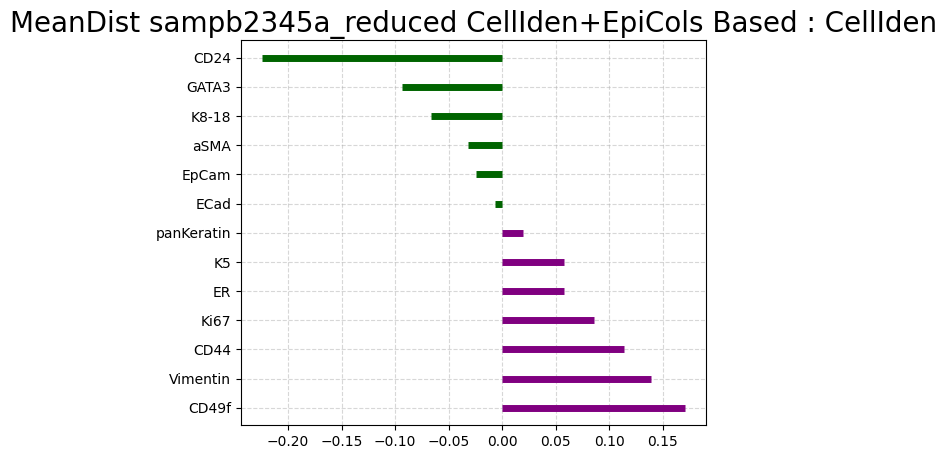

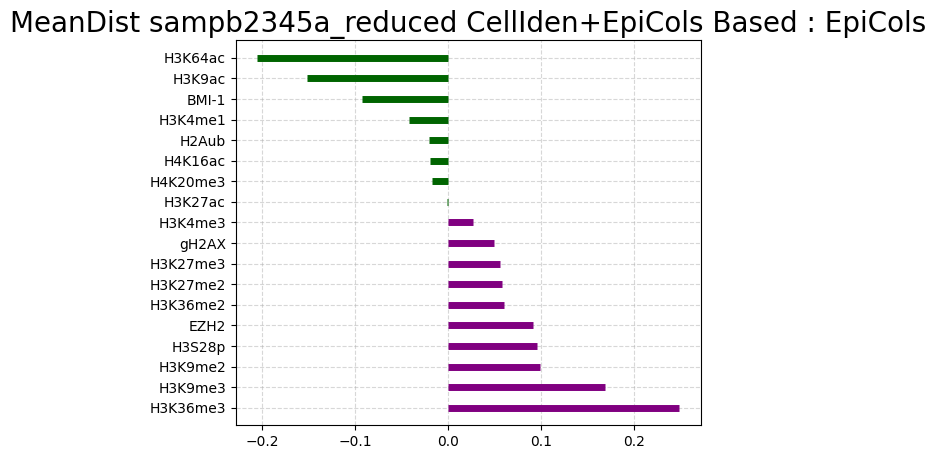

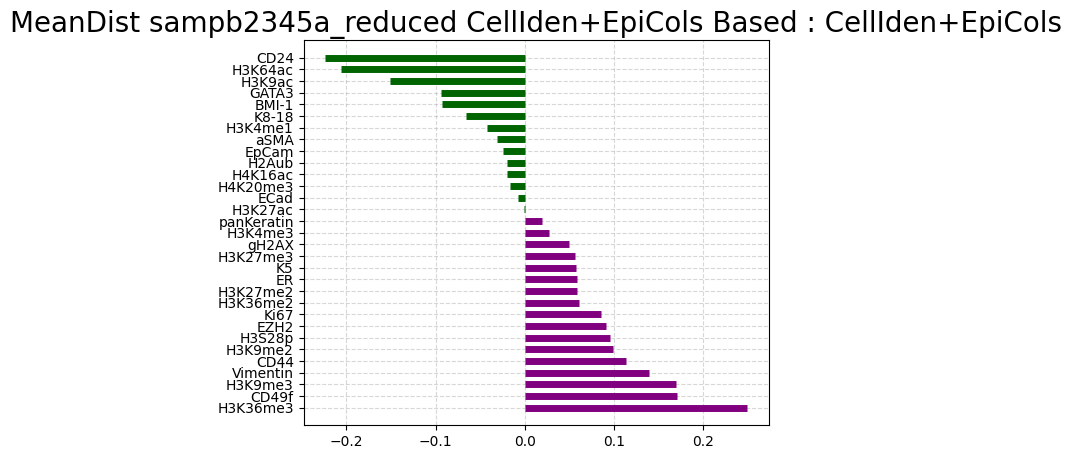

In [12]:
if not use_MASTER:

    from plot_functions_new import *
    if config['visualize']:
        for features_group in heatmaps.features_groups:
            group = config['groups'][features_group].copy()
            MeanDist(df[labels == 0], df[labels == 1], group, 
                    title='MeanDist ' + config['title'] + ': '+features_group,)
                    # figname='1_'+config['figname']+'ClustMeanDist_by_'+features_group)